In [42]:
# imports
import pystac_client
import xarray as xr
import matplotlib.pyplot as plt
import pathlib
import os
import numpy as np
import geopandas as gpd
import matplotlib as mpl
from matplotlib import colors

In [43]:
# opening STAC catalog, either a url, cloud storage link or a local (cloned) folder
cwd = pathlib.Path().resolve()

catalog = pystac_client.Client.open(
    "https://services.terrascope.be/stac/" # cloud API
    #os.path.join(os.path.dirname(cwd), "stac_folder", "current", "catalog.json") # local clone 
)
#catalog

In [44]:
# list(catalog.get_children())

In [45]:
a= catalog.get_child("urn:eop:VITO:ESA_WorldCover_10m_2020_AWS_V1")
# a

In [46]:
b=list(catalog.get_collections())
for collec in b:
    print(f"{collec.id}")

urn:eop:VITO:CGS_S1_GRD_L1
urn:eop:VITO:CGS_S1_GRD_SIGMA0_L1
urn:eop:VITO:CGS_S1_SLC_L1
urn:eop:VITO:CGS_S2_L1C
urn:eop:VITO:COP_DEM_EU_25M
urn:eop:VITO:COP_DEM_GLO_30M_COG
urn:eop:VITO:COP_DEM_GLO_90M_COG
urn:eop:VITO:ESA_WORLDCEREAL_ACTIVECROPLAND_V1
urn:eop:VITO:ESA_WORLDCEREAL_IRRIGATION_V1
urn:eop:VITO:ESA_WORLDCEREAL_MAIZE_V1
urn:eop:VITO:ESA_WORLDCEREAL_SPRINGCEREALS_V1
urn:eop:VITO:ESA_WORLDCEREAL_TEMPORARYCROPS_V1
urn:eop:VITO:ESA_WORLDCEREAL_WINTERCEREALS_V1
urn:eop:VITO:ESA_WorldCover_10m_2020_AWS_V1
urn:eop:VITO:ESA_WorldCover_10m_2020_V1
urn:eop:VITO:ESA_WorldCover_10m_2021_AWS_V2
urn:eop:VITO:ESA_WorldCover_10m_2021_V2
urn:eop:VITO:ESA_WorldCover_NDVI_10m_2020_V1
urn:eop:VITO:ESA_WorldCover_NDVI_10m_2021_V2
urn:eop:VITO:ESA_WorldCover_S1VVVHratio_10m_2020_V1
urn:eop:VITO:ESA_WorldCover_S1VVVHratio_10m_2021_V2
urn:eop:VITO:ESA_WorldCover_S2RGBNIR_10m_2020_V1
urn:eop:VITO:ESA_WorldCover_S2RGBNIR_10m_2021_V2
urn:eop:VITO:ESA_WorldCover_SWIR_10m_2020_V1
urn:eop:VITO:ESA_World

In [47]:
items=list(a.get_all_items())
print(f"Number of items: {len(items)}")
for item in items:
    print(f"- {item.id}")

Number of items: 2651
- urn:eop:VITO:ESA_WorldCover_10m_2020_AWS_V1:ESA_WorldCover_10m_2020_v100_N00E006
- urn:eop:VITO:ESA_WorldCover_10m_2020_AWS_V1:ESA_WorldCover_10m_2020_v100_N00E009
- urn:eop:VITO:ESA_WorldCover_10m_2020_AWS_V1:ESA_WorldCover_10m_2020_v100_N00E012
- urn:eop:VITO:ESA_WorldCover_10m_2020_AWS_V1:ESA_WorldCover_10m_2020_v100_N00E015
- urn:eop:VITO:ESA_WorldCover_10m_2020_AWS_V1:ESA_WorldCover_10m_2020_v100_N00E018
- urn:eop:VITO:ESA_WorldCover_10m_2020_AWS_V1:ESA_WorldCover_10m_2020_v100_N00E021
- urn:eop:VITO:ESA_WorldCover_10m_2020_AWS_V1:ESA_WorldCover_10m_2020_v100_N00E024
- urn:eop:VITO:ESA_WorldCover_10m_2020_AWS_V1:ESA_WorldCover_10m_2020_v100_N00E027
- urn:eop:VITO:ESA_WorldCover_10m_2020_AWS_V1:ESA_WorldCover_10m_2020_v100_N00E030
- urn:eop:VITO:ESA_WorldCover_10m_2020_AWS_V1:ESA_WorldCover_10m_2020_v100_N00E033
- urn:eop:VITO:ESA_WorldCover_10m_2020_AWS_V1:ESA_WorldCover_10m_2020_v100_N00E036
- urn:eop:VITO:ESA_WorldCover_10m_2020_AWS_V1:ESA_WorldCover_10m_

In [51]:
# # COP-DEM goes up in increments of 1 degree

# import math

# lon=-77.56
# lat=+18.28

# if lon>0:
#     sign_lon="E"
# else:
#     sign_lon="W"
# if lat>0:
#     sign_lat="N"
# else:
#     sign_lat="S"
# if abs(lat)<10:
#     newlat="0"+str(math.floor(abs(lat)))
# else:
#     newlat=str(math.floor(abs(lat)))
# if abs(lon)<100:
#     newlon="0"+str(math.floor(abs(lon)))
# else:
#     newlon=str(math.floor(abs(lon)))


# #  eg item_id="ESA_WorldCover_10m_2020_v100_S57W072"
# item_name="urn:eop:VITO:ESA_WorldCover_10m_2020_AWS_V1:ESA_WorldCover_10m_2020_v100_"+ sign_lat+newlat+sign_lon+newlon
# item_name

'urn:eop:VITO:ESA_WorldCover_10m_2020_AWS_V1:ESA_WorldCover_10m_2020_v100_N18W077'

In [55]:
# World cover goes up in increments of 3 degrees

import math

lon=-77.56
lat=+17.28

if lon>0:
    sign_lon="E"
else:
    sign_lon="W"
if lat>0:
    sign_lat="N"
else:
    sign_lat="S"
if abs(lat)<10:
    newlat="0"+str(abs(math.floor(lat/3)*3))
else:
    newlat=str(abs(math.floor(lat/3)*3))
if abs(lon)<100:
    newlon="0"+str(abs(math.floor(lon/3)*3))
else:
    newlon=str(abs(math.floor(lon/3)*3))


#  eg item_id="ESA_WorldCover_10m_2020_v100_S57W072"
item_name="urn:eop:VITO:ESA_WorldCover_10m_2020_AWS_V1:ESA_WorldCover_10m_2020_v100_"+ sign_lat+newlat+sign_lon+newlon
item_name

'urn:eop:VITO:ESA_WorldCover_10m_2020_AWS_V1:ESA_WorldCover_10m_2020_v100_N15W078'

In [56]:

item=a.get_item(item_name)


In [57]:

item.assets

{'ESA_WORLDCOVER_10M_MAP': <Asset href=s3://esa-worldcover/v100/2020/map/ESA_WorldCover_10m_2020_v100_N15W078_Map.tif>}

In [58]:
for asset_key in item.assets:
    asset = item.assets[asset_key]
    print('{}: {} ({})'.format(asset_key, asset.href, asset.media_type))

ESA_WORLDCOVER_10M_MAP: s3://esa-worldcover/v100/2020/map/ESA_WorldCover_10m_2020_v100_N15W078_Map.tif (image/tiff)


In [59]:
href=item.assets["ESA_WORLDCOVER_10M_MAP"].href

In [60]:
# https://github.com/rasterio/rasterio/issues/1637

import rasterio
from rasterio.session import AWSSession

aws_session = rasterio.session.AWSSession(aws_unsigned=True,
                                   region_name='us-west-1')

with rasterio.Env(aws_session):
    # Open the file in read mode
    with rasterio.open(href) as src:
        # Read the first band as a numpy array
        band1 = src.read(1)
        # Access metadata about the dataset
        print(src.meta)

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': 0.0, 'width': 36000, 'height': 36000, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(8.333333333333333e-05, 0.0, -78.0,
       0.0, -8.333333333333333e-05, 18.0)}


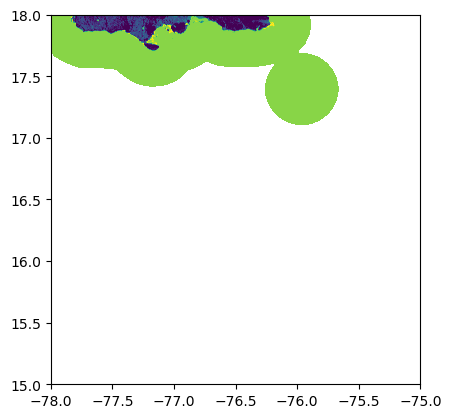

In [61]:
from rasterio.plot import show

with rasterio.Env(aws_session):
    img=rasterio.open(href)
    # Plot the entire raster as an RGB image
    show(img)

In [6]:
href = catalog.get_child("esl_gwl").assets["data"].href

In [7]:
ds = xr.open_zarr(href)

In [8]:
ds

<xarray.Dataset>
Dimensions:   (ensemble: 3, rp: 5, gwl: 4, nstations: 230)
Coordinates:
  * ensemble  (ensemble) int64 5 50 95
  * gwl       (gwl) float64 0.0 1.5 3.0 5.0
    lat       (nstations) float64 dask.array<chunksize=(230,), meta=np.ndarray>
    lon       (nstations) float64 dask.array<chunksize=(230,), meta=np.ndarray>
  * rp        (rp) float64 5.0 10.0 20.0 50.0 100.0
    stations  (nstations) |S15 dask.array<chunksize=(230,), meta=np.ndarray>
Dimensions without coordinates: nstations
Data variables:
    esl       (rp, gwl, ensemble, nstations) float64 dask.array<chunksize=(5, 4, 3, 230), meta=np.ndarray>
Attributes: (12/21)
    AUTHOR:              Tebaldi, C., Ranasinghe, R., Vousdoukas, M., Rasmuss...
    CITATION:            Tebaldi, C., Ranasinghe, R., Vousdoukas, M., Rasmuss...
    COMMENT:             
    CRS:                 EPSG:4326
    Conventions:         CF-1.8
    DESCRIPTION:         Extreme sea level projections for five return period...
    ...                  ...
    SPATIAL_EXTENT:      [-180, -90, 180, 90]
    TAGS:                ['climate change', 'extreme sea level', 'deltas']
    TEMPORAL_EXTENT:     ['2100-01-01T00:00:00Z']
    TITLE:               ESL by GWL
    TITLE_ABBREVIATION:  esl_gwl
    UNITS:               m

In [9]:
# plot input params
area = "Bangladesh" # look at np.unique(ds.stations.values) for options
GWL = 0 # look at ds.gwl.values for options
#ens = 50 # look at ds.ensemble.values for options
rp = 50.0 # look at ds.rp.values for options

# world shapefile
shapefile = r'p:\11208003-latedeo2022\020_InternationalDeltaPortfolio\datasets\05_world-administrative-boundaries\world-administrative-boundaries.shp'
world = gpd.read_file(shapefile)

In [10]:
# cropping
loclist = [i.decode("utf-8") for i in ds.stations.values]
idx_locl = [idx for idx, i in enumerate(loclist) if i == area] # idx matching the area string
ds_fil = ds.isel(nstations=idx_locl) # filter the area string
ds_fil = ds_fil.sel(gwl = GWL, rp = rp) # filter the other params

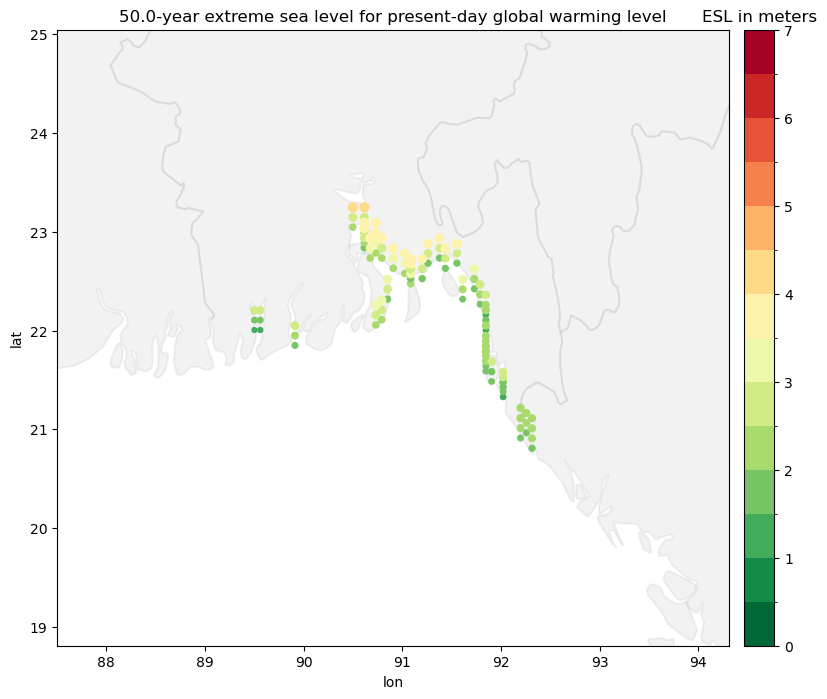

In [11]:
# plotting
cmap = mpl.cm.RdYlGn_r
norm = colors.BoundaryNorm(np.arange(0, 7.5, 0.5), cmap.N)
if GWL == 0:
    GWLs = 'present-day'
else:
    GWLs = '%s degree'%GWL

lonmin = min(ds_fil.lon.values); lonmax = max(ds_fil.lon.values);
latmin = min(ds_fil.lat.values); latmax = max(ds_fil.lat.values);
fig, ax = plt.subplots()
fig.set_size_inches(15, 8) #fig.set_size_inches(15, 20)
base = world.boundary.plot(ax=ax, edgecolor='grey',facecolor='grey',alpha=0.1,zorder=0);
im1 = ax.scatter(ds_fil.lon.values,ds_fil.lat.values,10*ds_fil.sel(ensemble=5).esl.values,ds_fil.sel(ensemble=5).esl.values,cmap=cmap, norm=norm,zorder=1)
# plt.set_clim(0,5)
im2 = ax.scatter(ds_fil.lon.values,ds_fil.lat.values+0.1,10*ds_fil.sel(ensemble=50).esl.values,ds_fil.sel(ensemble=50).esl.values,cmap=cmap, norm=norm,zorder=1)
im3 = ax.scatter(ds_fil.lon.values,ds_fil.lat.values+0.2,10*ds_fil.sel(ensemble=95).esl.values,ds_fil.sel(ensemble=95).esl.values,cmap=cmap, norm=norm,zorder=1)
ax.set_title('%s-year extreme sea level for %s global warming level'%(rp, GWLs))
ax.axis('square')
ax.set(xlabel = 'lon', ylabel = 'lat', xlim=[lonmin-2,lonmax+2], ylim=[latmin-2,latmax+2]);
#fig.colorbar(im1, ax=ax)
im1.set_clim(0,7)

cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height]) # to give colorbar own axes
plt.colorbar(im1, cax=cax) # Similar to fig.colorbar(im, cax = cax)
cax.set_title('ESL in meters');# 